# Simple Spectrum

This notebook constructs a simple IR spectrum of a molecule by name.

# Imports

Import a few necessary libraries.

In [1]:
import webmo
import webmo.util
import webmo.spectrum
import matplotlib.pyplot as plt
import numpy as np

# User Input

Define the molecule, along with configurable parameters.

In [2]:
## BOOKKEEPING PARAMETERS

# The URL of your WebMO instance
URL = "https://server.university.edu/~webmo/cgi-bin/webmo/rest.cgi"

# Your WebMO username
uname = "smith"

# The name of the molecule
molecule = "formaldehyde"

# The labels for the plot. Defaults are empty.
xlabel = "Wavenumber"
ylabel = "Absorption"

# Job Setup

Compute the infrared spectrum of the molecule. Start by opening a REST session to the WebMO server.

In [3]:
rest = webmo.WebMOREST(URL, username=uname)

Enter WebMO password for user smith: ········


Get the starting geometry of our molecule from PubChem.

In [4]:
geom = webmo.util.xyz_from_name(molecule)

## Template Construction

Use this geometry and build a job file for Gaussian.

In [5]:
# get template
job_type = "Optimize + Vib Freq" 
template = rest.get_templates("gaussian")[job_type]

# fill the template
job_string = rest.generate_input(template, {"geometry":geom, "jobName":molecule})

# display input file
print(job_string)

#N HF/6-31G(d) OPT FREQ 

formaldehyde

0 1
O	0.612300	0.000000	0.000000
C	-0.612300	0.000000	0.000000
H	-1.200000	0.242600	-0.899800
H	-1.200000	-0.242400	0.899800




## Job Submission

Submit the job.

In [6]:
n = rest.submit_job(molecule, job_string, "gaussian")
print("Job submitted")
rest.wait_for_job(n)
print("Job number {} has finished!".format(n))

Job submitted
Job number 70 has finished!


# Generating a Spectrum

## Getting Job Results

Get the results of our job and store them in variables.

In [7]:
a = rest.get_job_results(n)
peaks = a["properties"]["vibrations"]["frequencies"]
intensities = a["properties"]["vibrations"]["intensities"]["IR"]

## Plotting the Spectrum

Generate and plot the spectrum.

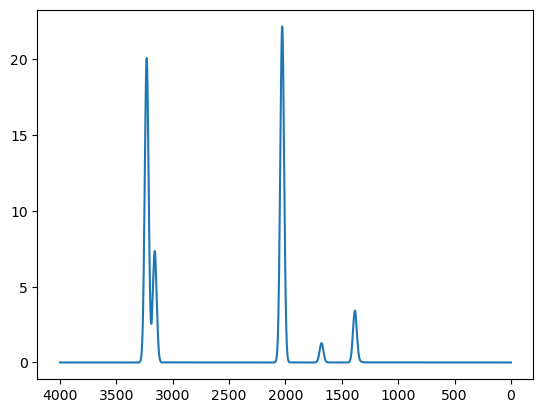

In [8]:
# construct the spectrum
axis, y_vals = webmo.spectrum.construct_spectrum(peaks,intensities, width=40)

# flip the x axis
plt.gca().invert_xaxis()

# and show the spectrum
plt.plot(axis, y_vals)
plt.show()